In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16 #32
plt.rcParams['xtick.labelsize'] = 16 #24
plt.rcParams['ytick.labelsize'] = 16 #24
plt.rcParams['legend.fontsize'] = 16 #32
plt.rcParams['text.usetex'] = True

In [3]:
from sklearn.svm import SVC

# filename = '/Users/roberto/data/RO-logging/2019-02-06-11-52-52/tmp_combined_data.csv';
# filename = '/Users/roberto/data/RO-logging/datasets/ro-eigenvecs/maxEVecs-ro-dataset.csv';
dateAndTime = "2019-03-18-15-00-42/";
filename = "/Users/roberto/data/odometry-comparisons/rugged_ro/"\
"2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/"\
"motion_estimation/standard-ro/"+dateAndTime+'tmp_combined_data.csv';

print('Reading from: ' + filename)
df_combined_data = pd.read_csv(filename, names=range(2400))
df_maxEVecs = df_combined_data.iloc[:,1:] #pd.read_csv(filename, names=range(2400))

df_labels = df_combined_data.iloc[:,0:1]
labels = np.copy(df_labels.values)
labels = labels.T

[m,n] = shape(df_maxEVecs)

print("Shape of max eigenvecs is:\n",shape(df_maxEVecs))
print("Shape of labels is:\n",shape(df_labels))
print("Shape of data is:\n",shape(df_combined_data))

Reading from: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/motion_estimation/standard-ro/2019-03-18-15-00-42/tmp_combined_data.csv
Shape of max eigenvecs is:
 (5955, 2399)
Shape of labels is:
 (5955, 1)
Shape of data is:
 (5955, 2400)


1265


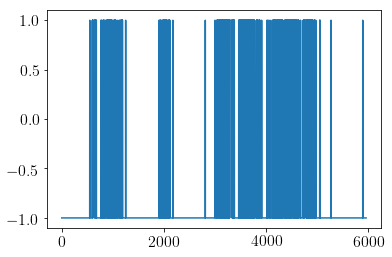

In [4]:
df_labels.head()
plt.plot(df_labels)
print(np.count_nonzero(df_labels+1))

In [5]:
# where_are_NaNs = isnan(df_maxEVecs)
# df_maxEVecs[where_are_NaNs] = 0.0
df_maxEVecs.head()

,1,2,3,4,5,6,7,8,9,10,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,0.026703,0.026701,0.026697,0.026691,0.026687,0.026681,0.026679,0.026677,0.026674,0.026669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.026910,0.026902,0.026901,0.026898,0.026897,0.026897,0.026896,0.026896,0.026894,0.026894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.026918,0.026916,0.026915,0.026907,0.026903,0.026897,0.026897,0.026892,0.026891,0.026878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.026909,0.026903,0.026895,0.026891,0.026891,0.026887,0.026882,0.026847,0.026847,0.026846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.026921,0.026920,0.026919,0.026918,0.026880,0.026876,0.026875,0.026872,0.026871,0.026855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Handcrafted features for all data (train and test data)
eigenvectors = np.copy(df_maxEVecs.values)
max_vals = []
max_vals = eigenvectors[:,0]
num_landmarks = count_nonzero(eigenvectors,axis=1)
area_under_curve = []

for i in range(m): 
    temp_sum = 0;
    for j in range(n):
        temp_sum += eigenvectors[i,j]
    area_under_curve.append(temp_sum)
    
temp_dict = {'max_vals':max_vals,
             'num_landmarks':num_landmarks,
             'area_under_curve':area_under_curve}

df_features = pd.DataFrame(data = temp_dict)
print(df_features.shape)
df_features.head()
    
# minus1_max_vals = [max_vals[0]]
# minus1_max_vals = np.append(minus1_max_vals,max_vals[0:m-1])
# minus1_num_landmarks = [num_landmarks[0]]
# minus1_num_landmarks = np.append(minus1_num_landmarks,num_landmarks[0:m-1])
# minus1_area_under_curve = [area_under_curve[0]]
# minus1_area_under_curve = np.append(minus1_area_under_curve,area_under_curve[0:m-1])

(5955, 3)


,max_vals,num_landmarks,area_under_curve
0,0.026703,1614,39.880415
1,0.026910,1604,39.792908
2,0.026918,1604,39.727950
3,0.026909,1614,39.871966
4,0.026921,1612,39.847845


In [7]:
eigenvectors = np.copy(df_maxEVecs.values)
max_vals = []
max_vals = eigenvectors[:,0]
num_landmarks = count_nonzero(eigenvectors,axis=1)
area_under_curve = []

for i in range(m): 
    temp_sum = 0;
    for j in range(n):
        temp_sum += eigenvectors[i,j]
    area_under_curve.append(temp_sum)
    
temp_dict = {'maxVals':max_vals,
             'numLandmarks':num_landmarks,
             'areaUnderCurve':area_under_curve}

df_features = pd.DataFrame(data = temp_dict)
print(df_features.shape)
df_features.head()

num_scans_used = 100
for i in range(1,num_scans_used):
    print('i = ',i)
    df_features[i*3] = df_features['maxVals'].iloc[:-i]
    df_features[i*3] = df_features[i*3].shift(i)
    df_features.loc[0:i,i*3] = df_features['maxVals'].iloc[0]

    df_features[i*3+1] = df_features['numLandmarks'].iloc[:-i]
    df_features[i*3+1] = df_features[i*3+1].shift(i)
    df_features.loc[0:i,i*3+1] = df_features['numLandmarks'].iloc[0]

    df_features[i*3+2] = df_features['areaUnderCurve'].iloc[:-i]
    df_features[i*3+2] = df_features[i*3+2].shift(i)
    df_features.loc[0:i,i*3+2] = df_features['areaUnderCurve'].iloc[0]

print(df_features.shape)
df_features.head()


(5955, 3)
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19
i =  20
i =  21
i =  22
i =  23
i =  24
i =  25
i =  26
i =  27
i =  28
i =  29
i =  30
i =  31
i =  32
i =  33
i =  34
i =  35
i =  36
i =  37
i =  38
i =  39
i =  40
i =  41
i =  42
i =  43
i =  44
i =  45
i =  46
i =  47
i =  48
i =  49
i =  50
i =  51
i =  52
i =  53
i =  54
i =  55
i =  56
i =  57
i =  58
i =  59
i =  60
i =  61
i =  62
i =  63
i =  64
i =  65
i =  66
i =  67
i =  68
i =  69
i =  70
i =  71
i =  72
i =  73
i =  74
i =  75
i =  76
i =  77
i =  78
i =  79
i =  80
i =  81
i =  82
i =  83
i =  84
i =  85
i =  86
i =  87
i =  88
i =  89
i =  90
i =  91
i =  92
i =  93
i =  94
i =  95
i =  96
i =  97
i =  98
i =  99
(5955, 300)


,maxVals,numLandmarks,areaUnderCurve,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.026703,1614,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,...,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415
1,0.026910,1604,39.792908,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,...,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415
2,0.026918,1604,39.727950,0.026910,1604.0,39.792908,0.026703,1614.0,39.880415,0.026703,...,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415
3,0.026909,1614,39.871966,0.026918,1604.0,39.727950,0.026910,1604.0,39.792908,0.026703,...,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415
4,0.026921,1612,39.847845,0.026909,1614.0,39.871966,0.026918,1604.0,39.727950,0.026910,...,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415,0.026703,1614.0,39.880415


In [8]:
# Handcrafted features for all data (train and test data)
runOldFeatureBuilding = False
if(runOldFeatureBuilding == True):
    eigenvectors = np.copy(df_maxEVecs.values)
    max_vals = []
    max_vals = eigenvectors[:,0]
    num_landmarks = count_nonzero(eigenvectors,axis=1)
    area_under_curve = []

    for i in range(m): 
        temp_sum = 0;
        for j in range(n):
            temp_sum += eigenvectors[i,j]
        area_under_curve.append(temp_sum)

    minus1_max_vals = [max_vals[0]]
    minus1_max_vals = np.append(minus1_max_vals,max_vals[0:m-1])
    minus1_num_landmarks = [num_landmarks[0]]
    minus1_num_landmarks = np.append(minus1_num_landmarks,num_landmarks[0:m-1])
    minus1_area_under_curve = [area_under_curve[0]]
    minus1_area_under_curve = np.append(minus1_area_under_curve,area_under_curve[0:m-1])

    minus2_max_vals = [minus1_max_vals[0]]
    minus2_max_vals = np.append(minus2_max_vals,minus1_max_vals[0:m-1])
    minus2_num_landmarks = [minus1_num_landmarks[0]]
    minus2_num_landmarks = np.append(minus2_num_landmarks,minus1_num_landmarks[0:m-1])
    minus2_area_under_curve = [minus1_area_under_curve[0]]
    minus2_area_under_curve = np.append(minus2_area_under_curve,minus1_area_under_curve[0:m-1])

    minus3_max_vals = [minus2_max_vals[0]]
    minus3_max_vals = np.append(minus3_max_vals,minus2_max_vals[0:m-1])
    minus3_num_landmarks = [minus2_num_landmarks[0]]
    minus3_num_landmarks = np.append(minus3_num_landmarks,minus2_num_landmarks[0:m-1])
    minus3_area_under_curve = [minus2_area_under_curve[0]]
    minus3_area_under_curve = np.append(minus3_area_under_curve,minus2_area_under_curve[0:m-1])

    minus4_max_vals = [minus3_max_vals[0]]
    minus4_max_vals = np.append(minus4_max_vals,minus3_max_vals[0:m-1])
    minus4_num_landmarks = [minus3_num_landmarks[0]]
    minus4_num_landmarks = np.append(minus4_num_landmarks,minus3_num_landmarks[0:m-1])
    minus4_area_under_curve = [minus3_area_under_curve[0]]
    minus4_area_under_curve = np.append(minus4_area_under_curve,minus3_area_under_curve[0:m-1])

    minus5_max_vals = [minus4_max_vals[0]]
    minus5_max_vals = np.append(minus5_max_vals,minus4_max_vals[0:m-1])
    minus5_num_landmarks = [minus4_num_landmarks[0]]
    minus5_num_landmarks = np.append(minus5_num_landmarks,minus4_num_landmarks[0:m-1])
    minus5_area_under_curve = [minus4_area_under_curve[0]]
    minus5_area_under_curve = np.append(minus5_area_under_curve,minus4_area_under_curve[0:m-1])

    minus6_max_vals = [minus5_max_vals[0]]
    minus6_max_vals = np.append(minus6_max_vals,minus5_max_vals[0:m-1])
    minus6_num_landmarks = [minus5_num_landmarks[0]]
    minus6_num_landmarks = np.append(minus6_num_landmarks,minus5_num_landmarks[0:m-1])
    minus6_area_under_curve = [minus5_area_under_curve[0]]
    minus6_area_under_curve = np.append(minus6_area_under_curve,minus5_area_under_curve[0:m-1])

    print(len(max_vals))

    temp_dict = {'max_vals':max_vals,
                 'num_landmarks':num_landmarks,
                 'area_under_curve':area_under_curve,
                 'minus1_max_vals':minus1_max_vals,
                 'minus1_num_landmarks':minus1_num_landmarks,
                 'minus1_area_under_curve':minus1_area_under_curve,
                 'minus2_max_vals':minus2_max_vals,
                 'minus2_num_landmarks':minus2_num_landmarks,
                 'minus2_area_under_curve':minus2_area_under_curve,
                 'minus3_max_vals':minus3_max_vals,
                 'minus3_num_landmarks':minus3_num_landmarks,
                 'minus3_area_under_curve':minus3_area_under_curve,
                 'minus4_max_vals':minus4_max_vals,
                 'minus4_num_landmarks':minus4_num_landmarks,
                 'minus4_area_under_curve':minus4_area_under_curve,
                 'minus5_max_vals':minus5_max_vals,
                 'minus5_num_landmarks':minus5_num_landmarks,
                 'minus5_area_under_curve':minus5_area_under_curve,
                 'minus6_max_vals':minus6_max_vals,
                 'minus6_num_landmarks':minus6_num_landmarks,
                 'minus6_area_under_curve':minus6_area_under_curve}

    df_features = pd.DataFrame(data = temp_dict)
    df_features.head()

In [9]:
maxEVecs = list(df_maxEVecs.values)
maxEVecs = np.array(maxEVecs)
# maxEVecs = np.array(maxEVecs + maxEVecs)
y_labels = list(ravel(labels))
y_labels = np.array(y_labels)
# y_labels = np.array(y_labels + y_labels)
len(y_labels)

5955

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

print('Good RO: ',np.count_nonzero(y_labels==-1))
print('Bad RO:',np.count_nonzero(y_labels==1),'\n')

X_total = np.copy(df_features.values)
y_total = np.copy(y_labels)

sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=0)

for train_index, test_index in sss.split(X_total, y_total):
    X_train, X_test = X_total[train_index], X_total[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    eig_train, eig_test = maxEVecs[train_index], maxEVecs[test_index]

print('Good vs Bad RO in training: ',np.count_nonzero(y_train==-1),'good,',np.count_nonzero(y_train==1),'bad')
print('Good vs Bad RO in testing:',np.count_nonzero(y_test==-1),'good,',np.count_nonzero(y_test==1),'bad \n')

print('Good/Bad ratio in training: ',np.count_nonzero(y_train==-1)/np.count_nonzero(y_train==1))
print('Good/Bad ratio in testing:',np.count_nonzero(y_test==-1)/np.count_nonzero(y_test==1),'\n')

# print('Bad RO % in training: ',np.count_nonzero(y_train==1)/np.count_nonzero(labels==1))
# print('Bad RO % in testing:',np.count_nonzero(y_test==1)/np.count_nonzero(labels==1),'\n')

print('Bad RO % in training: ',np.count_nonzero(y_train==1)/len(y_train))
print('Bad RO % in testing:',np.count_nonzero(y_test==1)/len(y_test),'\n')

[m_train,n_train] = shape(X_train)
[m_test,n_test] = shape(X_test)
print("Size of training data is: \n",shape(X_train))
print("Size of test data is: \n",shape(X_test))

Good RO:  4690
Bad RO: 1265 

Good vs Bad RO in training:  3752 good, 1012 bad
Good vs Bad RO in testing: 938 good, 253 bad 

Good/Bad ratio in training:  3.707509881422925
Good/Bad ratio in testing: 3.707509881422925 

Bad RO % in training:  0.21242653232577666
Bad RO % in testing: 0.21242653232577666 

Size of training data is: 
 (4764, 300)
Size of test data is: 
 (1191, 300)


In [11]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
# scaler = preprocessing.MaxAbsScaler().fit(X_train)
X_scaled = preprocessing.scale(X_train)
print("Mean: ",X_scaled.mean(axis=0))
print("Variance: ",X_scaled.std(axis=0))

Mean:  [ 1.86640049e-14 -1.43229024e-16  2.10218539e-14 -2.83358559e-15
 -2.17197284e-16  8.08864124e-15  9.15817473e-15  7.15445988e-18
  8.37323493e-15 -3.48662232e-15  3.03074107e-16  2.59319108e-14
  1.48394684e-14 -3.09913957e-16 -1.31523209e-14  1.51018763e-14
  2.72720087e-16 -2.17501872e-14  3.32906107e-15 -2.65553975e-16
  2.66876734e-14  3.18387447e-15 -1.84198211e-16  8.76761580e-15
 -1.29644639e-14  2.28896107e-16  1.12175872e-14  1.34937308e-15
 -1.30260109e-16  1.88448939e-15 -1.90739765e-15  3.24735574e-16
 -5.22252267e-16  1.54769611e-14 -1.82077508e-16  6.54414017e-15
  2.27434686e-14  4.79605161e-17 -1.23843467e-14  9.40457247e-15
 -9.89506079e-17  3.55732796e-15  1.20651926e-14 -2.59995868e-16
  3.84579019e-15  1.58712953e-14  2.81004812e-16  8.43993221e-16
 -5.99907287e-15  3.64364756e-16  3.84822317e-14  2.22204939e-14
  2.34908650e-17  1.84468543e-14 -7.11640374e-15  7.60889625e-17
 -1.02333013e-14  2.14218977e-15  3.29757678e-17  9.76005823e-15
  8.81982937e-15  

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
plot_fig = False
if(plot_fig == True):
    label_colours = []   
    test_colours = []
    for i in range(m_train):
        if(y_train[i] == 1):
            label_colours.append('red')
        else:
            label_colours.append('blue')
    for i in range(m_test):
        if(y_test[i] == 1):
            test_colours.append('red')
        else:
            test_colours.append('blue')

    plt.figure(figsize=(20,10))
    for i in range(300,600):
        plt.plot(X_train[i,:].T,color=label_colours[i],markersize=0.1);
        plt.plot(eig_train[i,:].T, color=label_colours[i],markersize=0.1);
        plt.title("Normalised eigenvector element magnitudes classified by odometry estimate",fontsize=32,y=1.03)

    line1, = plt.plot([],[],color='blue',label='Success')
    line2, = plt.plot([],[],color='red',label='Failure')
    plt.legend(handles=[line1,line2],fontsize=24)
    plt.xlabel('Element index',labelpad=10)
    plt.ylabel('Element magnitude',labelpad=10)

    # for i in range(m_train):
    #     plt.subplot(121)
    #     plt.plot(eig_train[i,:].T, color=label_colours[i]);
    #     plt.title("Training data", fontsize=16)

    # for i in range(m_test):
    #     plt.subplot(122)
    #     plt.plot(eig_test[i,:].T, color=test_colours[i]);
    #     plt.title("Test data", fontsize=16)
    plt.savefig("/Users/roberto/data/fig1.pdf",bbox_inches='tight',pad_inches = 0)

In [16]:
from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import average_precision_score

# SVM Classifier model
# clf = RandomForestClassifier(n_estimators=30,class_weight='balanced')
# clf = SVC(kernel="rbf",class_weight='balanced', C=float(20),gamma=0.1,random_state=0)
clf = SVC(kernel="linear",class_weight='balanced', C=float(1),gamma=0.001,random_state=0)
print(clf.fit(X_train, y_train))

y_predictions_X_train = clf.predict(X_train)
dec_func_X_train = clf.decision_function(X_train)

print('\nTrain metrics:')
print('Accuracy:',clf.score(X_train,y_train))
print('Precision:',precision_score(y_train,y_predictions_X_train))
print('Recall:',recall_score(y_train,y_predictions_X_train))
print('F1 score:',f1_score(y_train,y_predictions_X_train))
print('Average precision:',average_precision_score(y_train,dec_func_X_train))

y_predictions_X_test = clf.predict(X_test)
dec_func_X_test = clf.decision_function(X_test)

# print('\nTest metrics:')
# print('Accuracy:',clf.score(X_test,y_test))
# print('Precision:',precision_score(y_test,y_predictions_X_test))
# print('Recall:',recall_score(y_test,y_predictions_X_test))
# print('F1 score:',f1_score(y_test,y_predictions_X_test))
# print('Average precision:',average_precision_score(y_test,dec_func_X_test))

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

Train metrics:
Accuracy: 0.8589420654911839
Precision: 0.606516290726817
Recall: 0.9565217391304348
F1 score: 0.7423312883435583
Average precision: 0.7138114293404954


In [ ]:
from sklearn.model_selection import GridSearchCV

doGridSearch = False
if(doGridSearch == True):
    # parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 20, 40],'gamma':[0.0001,0.001,0.01,0.1]}
    parameters = {'kernel':['linear'], 'C':[0.01,0.1,1,10],'gamma':[0.0001,0.001,0.01,0.1]}

    svc = SVC()
    clf_GS = GridSearchCV(svc, parameters, cv=5,scoring='average_precision',n_jobs=-1,verbose=0)
    clf_GS.fit(X_train,y_train)
    cv_results = clf_GS.cv_results_
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
    
    # export to csv
    scores_df.to_csv('/Users/roberto/data/gridSearch.csv')

In [112]:
# The results here change depending on C value of SVM...
from sklearn.feature_selection import RFE
clf_tmp = clf
selector = RFE(clf_tmp,1,step=1,verbose=1)
selector = selector.fit(X_train,y_train)
print(selector.ranking_)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
[8 2 9 4 7 3 6 1 5]


In [ ]:
features_names = list(df_features)#['1', '2','3','4','5','6','7','8','9']
plt.figure(figsize=(30,15))
# clf_tmp = SVC(kernel="linear",class_weight='balanced', C=float(1),random_state=0)
# clf_tmp.fit(X_train, y_train)
pd.Series(abs(clf.coef_[0]), index=features_names).nlargest(len(features_names)).plot(kind='barh')
# pd.Series(abs(svm.coef_[0])).nlargest(6).plot(kind='barh')


In [15]:
# print('Testing on X data with shape: ',shape(X_test))
# predictions = clf.predict(X_test)
# successes = 0
# for i in range(len(predictions)):
#     if predictions[i] == y_test[i]:
#         successes+=1   
# print('Successes: ',successes,' out of ',len(y_test))
# print('Classification accuracy = ',successes/len(y_test))

/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


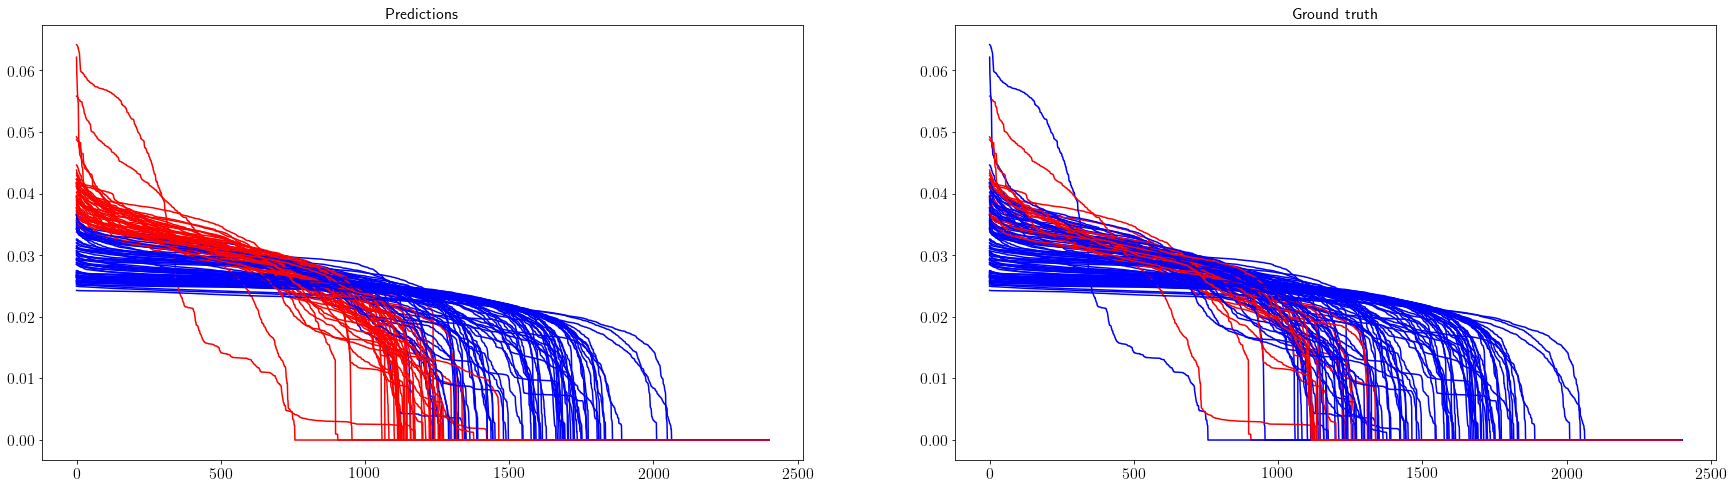

In [38]:
predict_colours = []
correct_colours = []
predictions = clf.predict(X_test)
for i in range(m_test):
    if(predictions[i] == 1):
        predict_colours.append('red')
    else:
        predict_colours.append('blue')
for i in range(m_test):
    if(y_test[i] == 1):
        correct_colours.append('red')
    else:
        correct_colours.append('blue')

plt.figure(figsize=(30,8))
for i in range(m_test):
    if(i%10 ==0):
        plt.subplot(121)
        plt.plot(eig_test[i,:].T, color=predict_colours[i]);
        plt.title("Predictions", fontsize=16)

        plt.subplot(122)
        plt.plot(eig_test[i,:].T, color=correct_colours[i]);
        plt.title("Ground truth", fontsize=16)

In [17]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
tmp_score = 'average_precision'
scores = cross_val_score(
    clf, X_train, y_train, cv=5, scoring=tmp_score)
print(scores)
print('Mean average precision score:',scores.mean())

[0.66701708 0.58804144 0.63303766 0.69334793 0.62192372]
Mean average precision score: 0.6406735678749232


In [18]:
y_predictions = clf.predict(X_train)
print('Accuracy:',clf.score(X_train,y_train))
print('Precision:',precision_score(y_train,y_predictions))
print('Recall:',recall_score(y_train,y_predictions))
print('F1 score:',f1_score(y_train,y_predictions))
# This requires a probability or decision function
# print('Average precision:',average_precision_score(y_train,y_predictions))

Accuracy: 0.8589420654911839
Precision: 0.606516290726817
Recall: 0.9565217391304348
F1 score: 0.7423312883435583


Area under PR curve: 0.7109839048094272
Average precision score: 0.7113536182057195


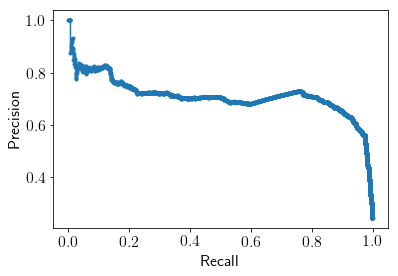

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
clf_probs = SVC(kernel="linear",class_weight='balanced', C=float(0.1),gamma=0.001,random_state=0,probability=True)
clf_probs.fit(X_train,y_train)
probs = clf_probs.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, probs)
print('Area under PR curve:',auc(recall,precision))
print('Average precision score:',average_precision_score(y_train, probs))
# plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf,X_train, y_train, cv=5)

(0, 500)

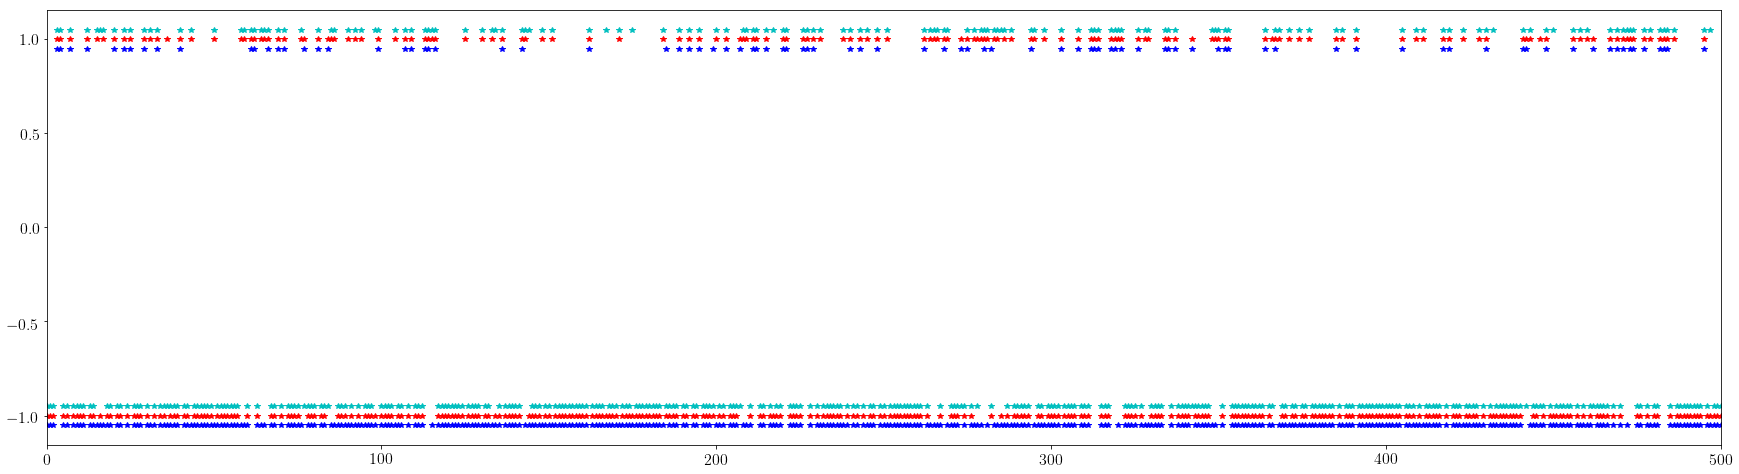

In [22]:
plt.figure(figsize=(30,8))
plt.plot(y_predictions,'r*')
plt.plot(y_train-0.05,'b*')
plt.plot(y_train_pred+0.05,'c*')

plt.xlim(0,500)

In [31]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf,X_train, y_train, cv=5)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[3075,  677],
       [ 139,  873]])

In [24]:
from sklearn.metrics import precision_score, recall_score
print('Precision (% when positive prediction is correct):\n',precision_score(y_train,y_train_pred),'\n')
print('Recall (% of bad RO instances detected):\n',recall_score(y_train, y_train_pred),'\n')
print('F1 score: \n',f1_score(y_train,y_train_pred))

Precision (% when positive prediction is correct):
 0.5632258064516129 

Recall (% of bad RO instances detected):
 0.8626482213438735 

F1 score: 
 0.6814988290398126


In [25]:
from sklearn.model_selection import cross_val_score
# y_scores = cross_val_predict(clf, X_train, y_train, cv=5,
#                                  method="decision_function")
# y_scores = cross_val_predict(clf, X_train, y_train, cv=3)
y_scores = clf_probs.predict_proba(X_train)
y_scores = y_scores[:, 1]

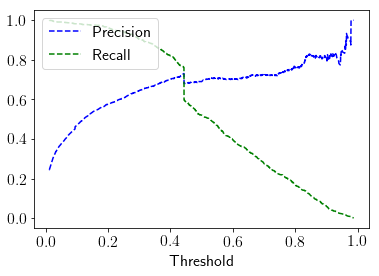

*** If we set a threshold here: ***
Precision (% when positive prediction is correct):
 0.6067558954748248 

Recall (% of bad RO instances detected):
 0.9407114624505929 



In [26]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
#     plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Need to set all bad RO labels from -1 to 0 for this function to work
tmp_y_train = np.array(y_train)
indices = [i for i, x in enumerate(tmp_y_train) if x == -1]
tmp_y_train[indices] = 0

y_train_pred_thresholding = (y_scores > 0.25)
print('*** If we set a threshold here: ***')
print('Precision (% when positive prediction is correct):\n',
      precision_score(tmp_y_train,y_train_pred_thresholding),'\n')
print('Recall (% of bad RO instances detected):\n',
      recall_score(tmp_y_train, y_train_pred_thresholding),'\n')

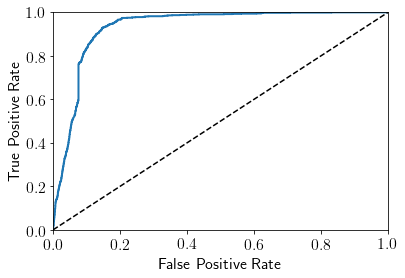

Area under ROC curve 0.9311664872278921


In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

print('Area under ROC curve',roc_auc_score(y_train, y_scores))

In [37]:
import sys
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts")
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts/config")
sys.path.append("/Users/roberto/code/corelibs/src/tools-python")
sys.path.append("/Users/roberto/code/corelibs/build/datatypes")
sys.path.append("/Users/roberto/code/corelibs/build/datatypes/datatypes_python")
import module

from mrg.logging import IndexedMonolithic #MonolithicDecoder
# sys.path.append("/Users/roberto/code/radar-utilities/build/radarutilities_datatypes_python")
# sys.path.append("/Users/roberto/code/radar-utilities/build/radarutilities_datatypes_python/protobuf/")

# for p in sys.path:
#     print(p)

from protobuf.classification_score import pbClassificationScore_pb2
classification_file = "/Users/roberto/data/odometry-comparisons/"\
"rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/"\
"motion_estimation/ground-truth/labels.monolithic"

mono_decoder = IndexedMonolithic(classification_file) #MonolithicDecoder(classification_file)
classification_scores = []
classification_timestamps = []

for pb, _, _ in mono_decoder:
    timestamp = pb.timestamp
    classification_score = pb.score
    classification_scores.append(classification_score)
    classification_timestamps.append(timestamp)
print("Finished importing ground truth labels.")
print("Size of imported labels is:",len(classification_scores))

# classification_scores, timestamps  = map(list, zip(*[pb.score, pb.timestamp for pb, _, _ in mono_decoder]))
# classification_timestamps = [pb.timestamp for pb, _, _ in mono_decoder]

importing  protobuf.logging.pbMonolithicIndexArray_pb2
importing  protobuf.classification_score.pbClassificationScore_pb2
Finished importing ground truth labels.
Size of imported labels is: 5955


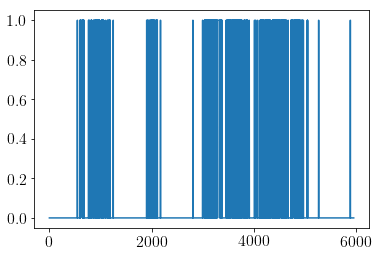

In [38]:
import matplotlib.pyplot as plt
plt.plot(classification_scores)
plt.show()

In [39]:
X_experiment = np.copy(df_features.values)
X_experiment = preprocessing.scale(X_experiment)
predictions = clf.predict(X_experiment)
for i in range(len(predictions)):
    if predictions[i] == -1:
        predictions[i] = 0

Ground truth failures:  1265
Predicted failures:  2343
True positives:  1148
False positives:  1195
True negatives:  3495
False negatives:  117
True positives:  1148
Confusion matrix:
 3495   1195 
 117   3495
Precision: 0.4899701237729407
Recall: 0.9075098814229249
F1 score: 0.6363636363636364


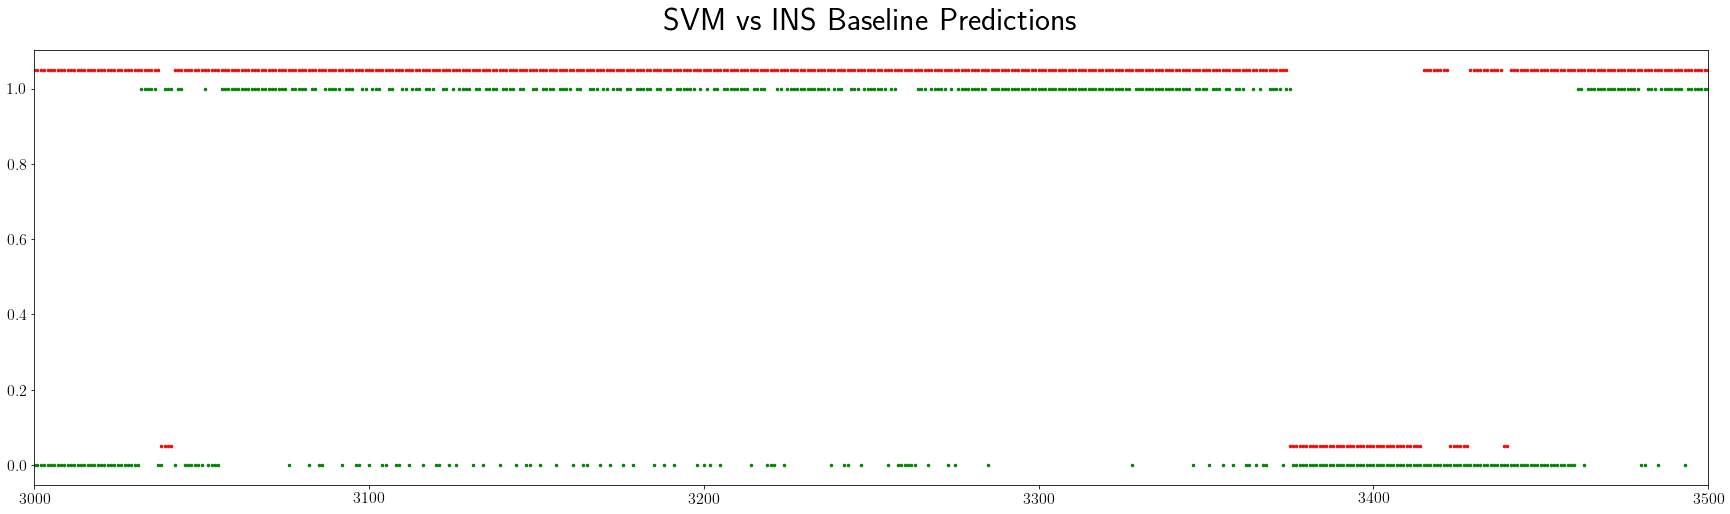

In [87]:
plt.figure(figsize=(30,8))
plt.plot(classification_scores,'g.',markersize=5)
plt.plot([x+0.05 for x in predictions],'r.',markersize=5)
plt.xlim(3000,3500)
plt.title("SVM vs INS Baseline Predictions",fontsize=32,y=1.03)


TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(classification_scores)):
    if(classification_scores[i] == 1 and predictions[i] == 1):
        TP += 1
    elif(classification_scores[i] == 0 and predictions[i] == 1):
        FP += 1
    elif(classification_scores[i] == 0 and predictions[i] == 0):
        TN += 1
    else:
        FN += 1
print("Ground truth failures: ", count_nonzero(classification_scores))
print("Predicted failures: ", count_nonzero(predictions))
print("True positives: ", TP)
print("False positives: ", FP)
print("True negatives: ", TN)
print("False negatives: ", FN)
print("True positives: ", TP)
print("Confusion matrix:\n", TN," ",FP,"\n",FN," ",TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",2*(precision*recall)/(precision+recall))

In [41]:
# from matplotlib import pyplot as plt
# from sklearn import svm
# def f_importances(coef, names):
#     imp = coef
#     imp,names = zip(*sorted(zip(imp,names)))
#     plt.barh(range(len(names)), imp, align='center')
#     plt.yticks(range(len(names)), names)
#     plt.show()

# features_names = ['input1', 'input2']
# svm = svm.SVC(kernel='linear')
# svm.fit(X_train, y_train)
# plt.plot(abs(svm.coef_).T,'*--')
# f_importances(svm.coef_, features_names)

Ground truth failures:  1391
Predicted failures:  2343
True positives:  1284
False positives:  1059
True negatives:  3505
False negatives:  107
True positives:  1284
Confusion matrix:
 3505   1059 
 107   3505
Precision: 0.5480153649167734
Recall: 0.9230769230769231
F1 score: 0.6877343331547938


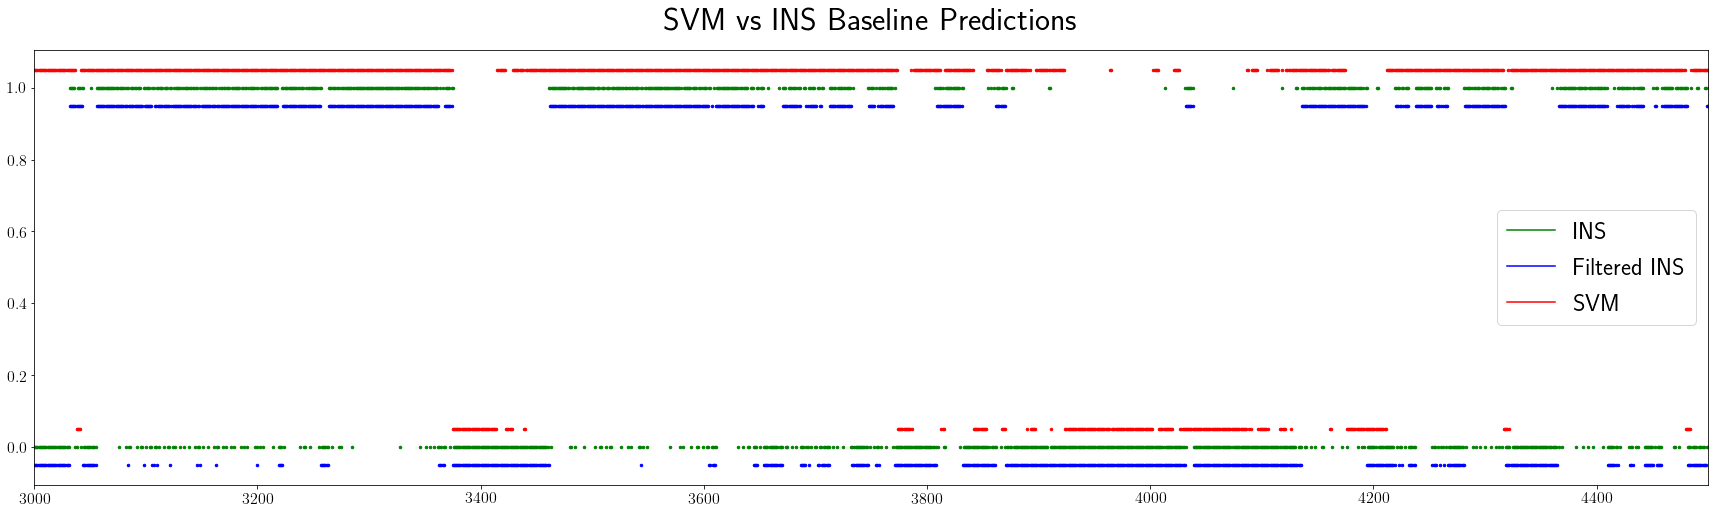

In [114]:
import scipy.signal
tmp_gt = np.array(classification_scores)
tmp_gt = scipy.signal.medfilt(tmp_gt,5)

plt.figure(figsize=(30,8))
plt.plot(classification_scores,'g.',markersize=5)
plt.plot([x-0.05 for x in tmp_gt],'b.',markersize=5)
plt.plot([x+0.05 for x in predictions],'r.',markersize=5)
plt.xlim(3000,4500)
plt.title("SVM vs INS Baseline Predictions",fontsize=32,y=1.03)
line1, = plt.plot([],[],color='green',label='INS')
line2, = plt.plot([],[],color='blue',label='Filtered INS')
line3, = plt.plot([],[],color='red',label='SVM')
plt.legend(handles=[line1,line2,line3],fontsize=24,loc='right')
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(classification_scores)):
    if(tmp_gt[i] == 1 and predictions[i] == 1):
        TP += 1
    elif(tmp_gt[i] == 0 and predictions[i] == 1):
        FP += 1
    elif(tmp_gt[i] == 0 and predictions[i] == 0):
        TN += 1
    else:
        FN += 1
print("Ground truth failures: ", count_nonzero(tmp_gt))
print("Predicted failures: ", count_nonzero(predictions))
print("True positives: ", TP)
print("False positives: ", FP)
print("True negatives: ", TN)
print("False negatives: ", FN)
print("True positives: ", TP)
print("Confusion matrix:\n", TN," ",FP,"\n",FN," ",TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",2*(precision*recall)/(precision+recall))

In [144]:
X_experiment = np.copy(df_features.values)
X_experiment = preprocessing.scale(X_experiment)
predictions = clf.predict(X_experiment)
for i in range(len(predictions)):
    if predictions[i] == -1:
        predictions[i] = 0
y_train_pred_thresholding = (predictions > -0.5)

Area under PR curve: 0.6590249670066106
Average precision score: 0.6597149167719648


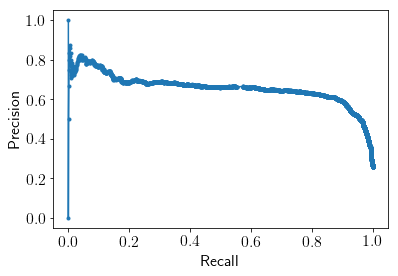

In [146]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
clf_probs = SVC(kernel="linear",class_weight='balanced', C=float(10),gamma=0.001,random_state=0,probability=True)
clf_probs.fit(X_experiment,tmp_gt)
probs = clf_probs.predict_proba(X_experiment)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(tmp_gt, probs)
print('Area under PR curve:',auc(recall,precision))
print('Average precision score:',average_precision_score(tmp_gt, probs))
# plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()